In [1]:
import pandas as pd
import matplotlib.pyplot as plt

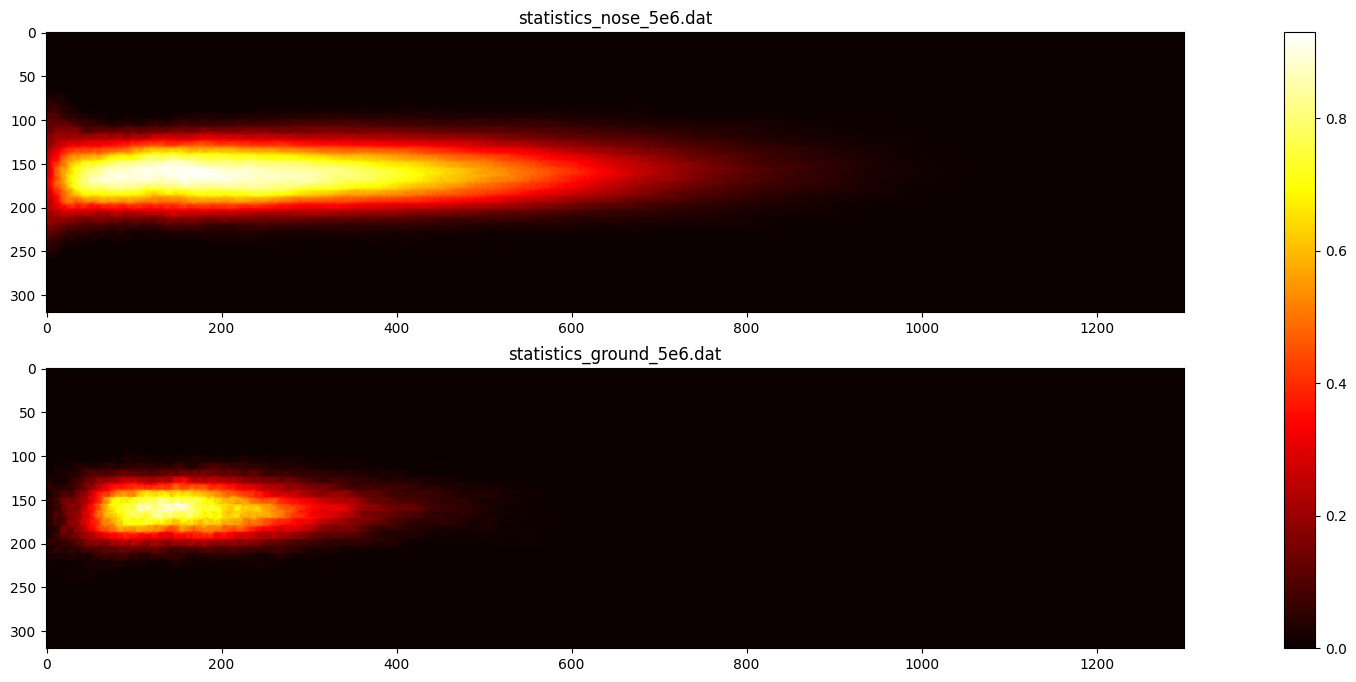

In [4]:
files = [
    'statistics_nose_5e6.dat',
    'statistics_ground_5e6.dat'
]

fig, axes = plt.subplots(2, 1, figsize=(26,8))
ims = []
for i, f in enumerate(files):
    df = pd.read_csv('./Data/' + f, sep=' ', skiprows=[0], names=list(range(320)), index_col=False)
    
    np_data = df.to_numpy()
    
    ims.append(axes[i].imshow(np_data.T, cmap='hot', interpolation='nearest'))
    axes[i].set_title(f)
    
plt.colorbar(ims[0], ax=axes.ravel().tolist())
# plt.savefig("statistics.jpg")
plt.show()